<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml10_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree(의사결정 나무)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋

wine 데이터셋 red/white 와인 분류

In [2]:
file_path = 'https://bit.ly/wine_csv_data'  # csv 파일이 저장된 GitHub 경로

In [3]:
wine_df = pd.read_csv(file_path)

In [4]:
wine_df.head(n=6)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
5,9.4,1.8,3.51,0.0


In [5]:
wine_df.tail(n=6)

,alcohol,sugar,pH,class
6491,9.7,1.3,3.29,1.0
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [6]:
# 연속형 자료(숫자 타입) 변수들의 기술 통계량
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
# 카테고리 타입 변수 빈도수(0 - red wine, 1 - white wine)
wine_df['class'].value_counts().sort_index()

,count
class,
0.0,1599
1.0,4898


class 빈도수 막대 그래프

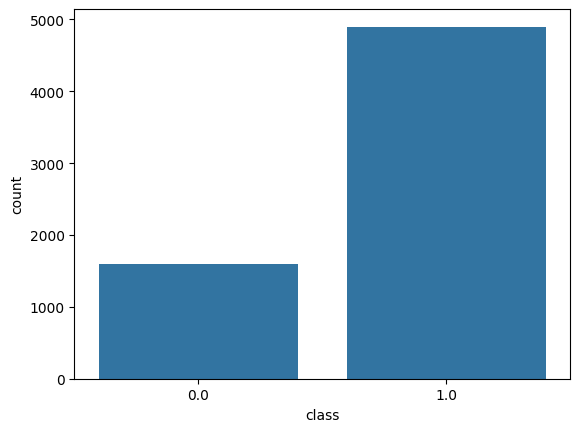

In [8]:
sns.countplot(data=wine_df, x='class')
plt.show()

alcohol, sugar, pH 변수들의 히스토그램

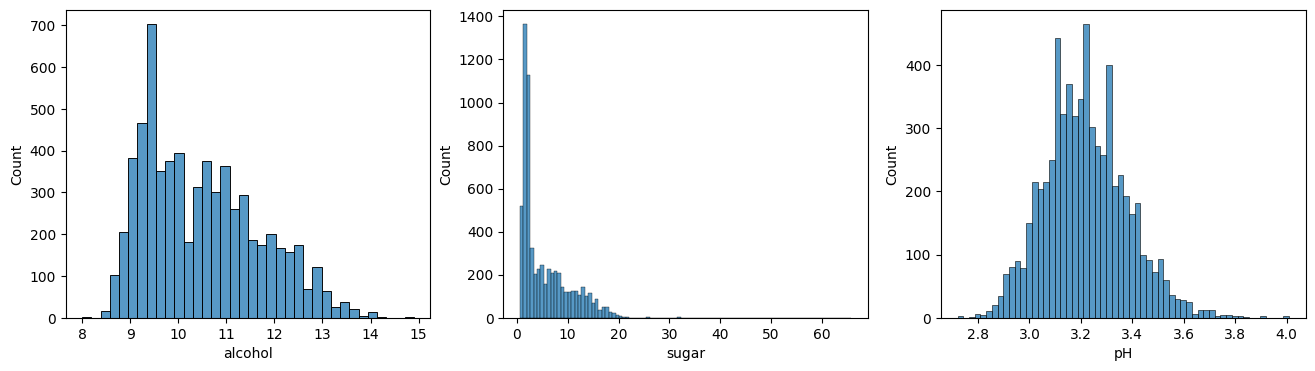

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, var in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=var, ax=axes[i])

plt.show()

alcohol, sugar, pH 변수들의 pairplot (class별로 색깔을 다르게)

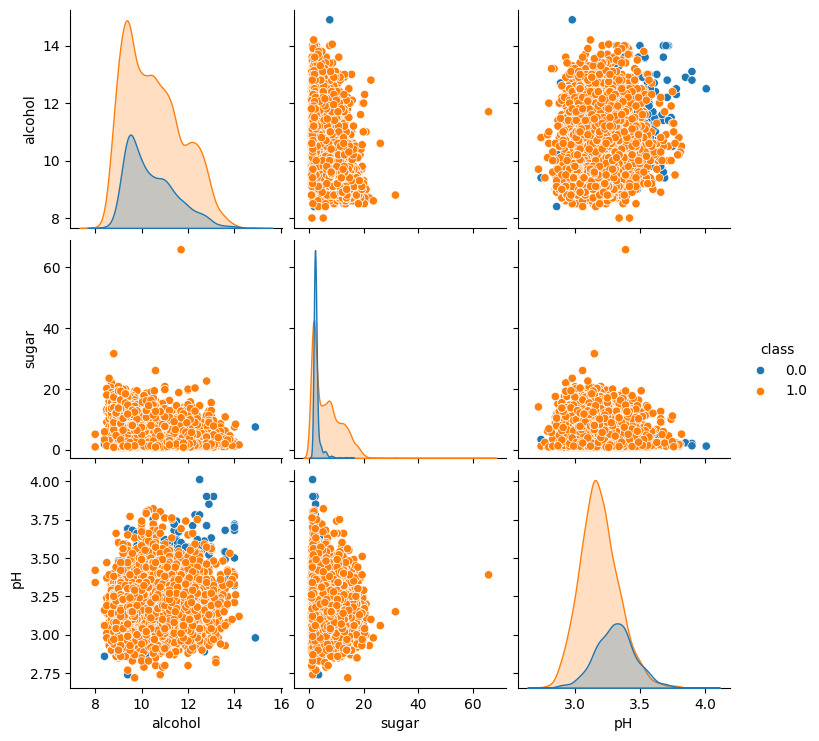

In [10]:
sns.pairplot(data=wine_df, hue='class')
plt.show()

In [11]:
feature_names = wine_df.columns[:3]
target_names = ['red', 'white']
print(feature_names)
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


# 훈련 셋, 테스트 셋 나누기

In [12]:
x = wine_df[wine_df.columns[:3]].values  # 특성 배열(2d array)
y = wine_df['class'].values  # 타겟 배열(1d array)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [14]:
x_train.shape

(5197, 3)

In [15]:
x_test.shape

(1300, 3)

# Decision Tree Classifier

In [16]:
tree_clf = DecisionTreeClassifier(random_state=42)  # 모델 생성

In [17]:
tree_clf.fit(X=x_train, y=y_train)  # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [18]:
train_pred = tree_clf.predict(X=x_train)  # 훈련 셋 예측값
train_pred[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [19]:
y_train[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [20]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[1276,    3],
       [   8, 3910]])

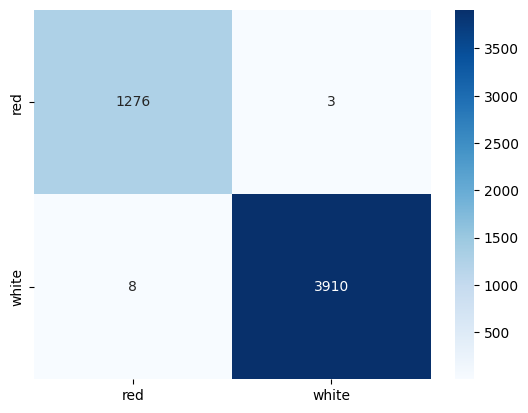

In [21]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [22]:
print(classification_report(y_true=y_train, y_pred=train_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

         red       0.99      1.00      1.00      1279
       white       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [23]:
test_pred = tree_clf.predict(X=x_test)  # 테스트 셋 예측값
test_pred[:10]

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [24]:
y_test[:10]

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [25]:
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[226,  94],
       [ 81, 899]])

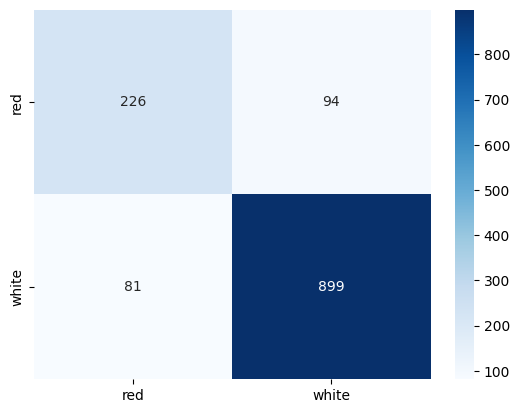

In [26]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [27]:
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

         red       0.74      0.71      0.72       320
       white       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



Decision Tree 분류 알고리즘은 과대적합(over-fitting)이 너무 크다!

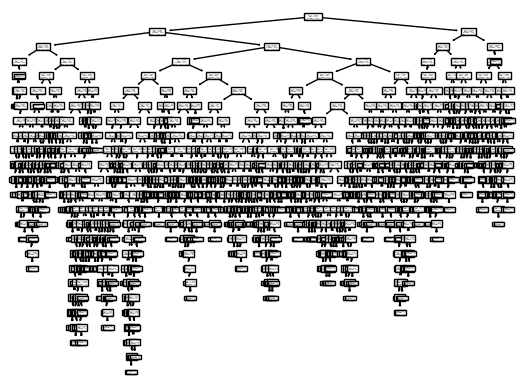

In [28]:
plot_tree(tree_clf)
plt.show()

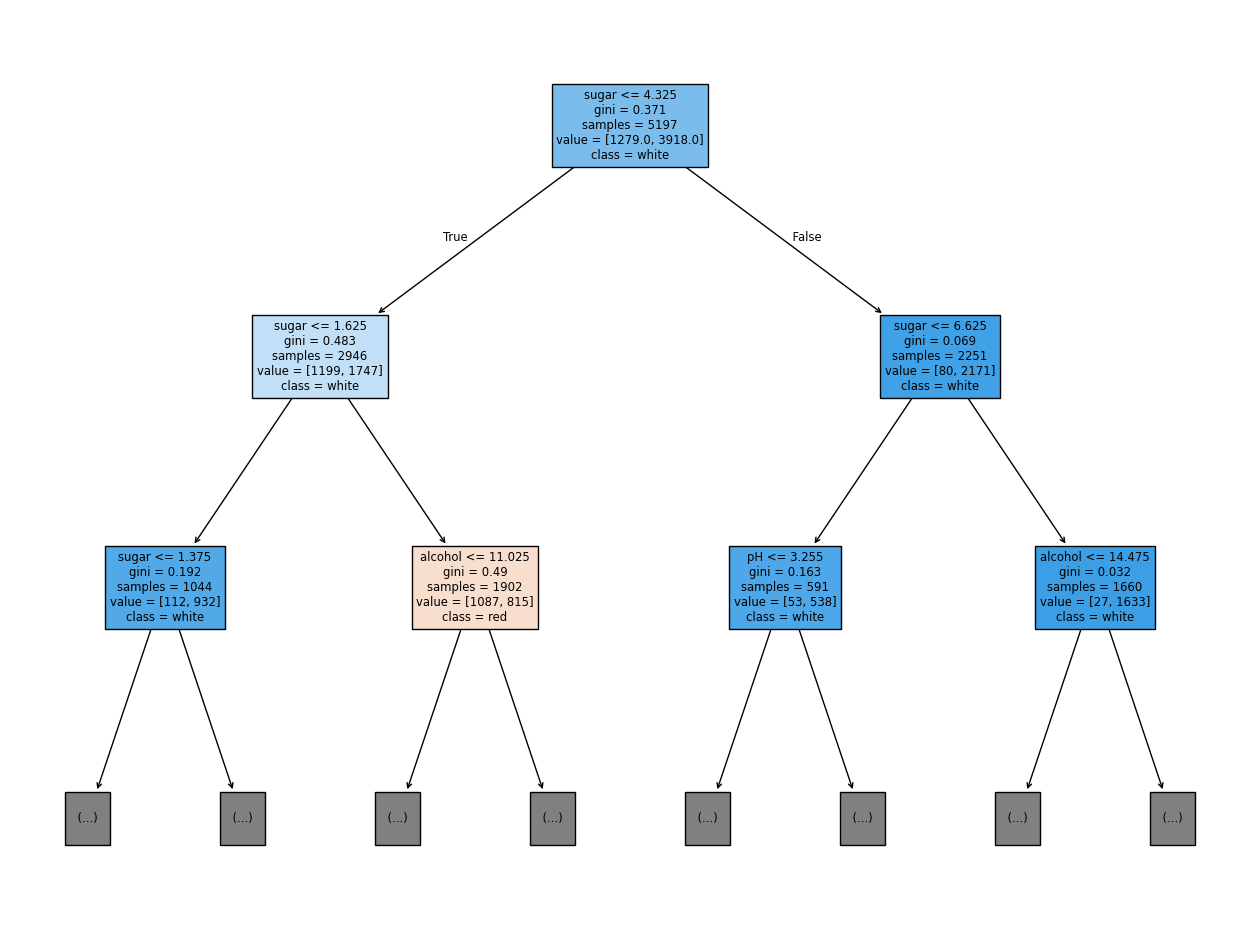

In [29]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2,
          feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

**Decision Tree를 나누는 기준**

---

**Gini impurity(Gini 불순도)**

$$
Gini = 1 - \sum_i p_i^2
$$

*   $ p_i $: i번째 클래스가 될 확률
*   이진(binary-class) 분류
    *   $ Gini = 1 - (p_0^2 + p_1^2) $
    *   양성(positive) 또는 음성(negative)으로 완벽하게 분류가 된 경우, $ Gini = 1 - 1 = 0 $.
        *   Gini 불순도 최소.
    *   양성과 음성이 똑같은 비율로 섞여 있는 경우, $ Gini = 1 - (0.5^2 + 0.5^2) = 0.5 $.
        *   Gini 불순도 최대.
    *   양성과 음성의 비율이 6:4인 경우, $ Gini = 1 - (0.6^2 + 0.4^2) = 0.48 $
*   Decision tree는 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 커지도록 가지를 성장시킴.

---

**Entropy(엔트로피)**

$$
Entropy = -\sum_i p_i \log_k (p_i)
$$

*   $k$: 클래스의 개수(이진 분류인 경우, k=2).
*   $p_i$: $i$번째 클래스가 될 확률.
*   이진 분류
    *   양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
    *   양성 또는 음성으로 완벽히 분류된 경우, Entropy = 0. 엔트로피 최소.
*   Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성함.

---

**Decision Tree 특징**

*   장점:
    *   특성들을 스케일링할 필요가 없다.
    *   결과를 이해하기 쉽다.
*   단점:
    *   과대적합(over-fitting)되기가 쉽다.
    *   여러가지 규제들을 적용해서 과대적합 문제를 해결해야 함.
*   규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    *   `max_depth`: decision tree의 최대 깊이.
    *   `max_leaf_node`: leaf node의 최댓값.
    *   `max_features`: 각 노드에서 분할에 사용할 특성의 최대 개수.
    *   `min_samples_split`: 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    *   `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 개수.
    *   `max_`로 시작하는 파라미터의 값을 증가시키면, 트리의 크기가 커짐.
        *   규제가 작아짐.
        *   overfitting이 커짐.
    *   `max_`로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 작아지기 때문에 과대적합(over-fitting)이 작아짐.
    *   `min_`으로 시작하는 파라미터 값을 증가시키면, 트리의 크기가 작아지고 과대적합이 줄어듦.
    *   `min_`으로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 커지고 과대적합이 커짐.
    

# 하이퍼 파라미터 튜닝

max_depth=4 Decision Tree

In [30]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [31]:
tree_clf.fit(X=x_train, y=y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

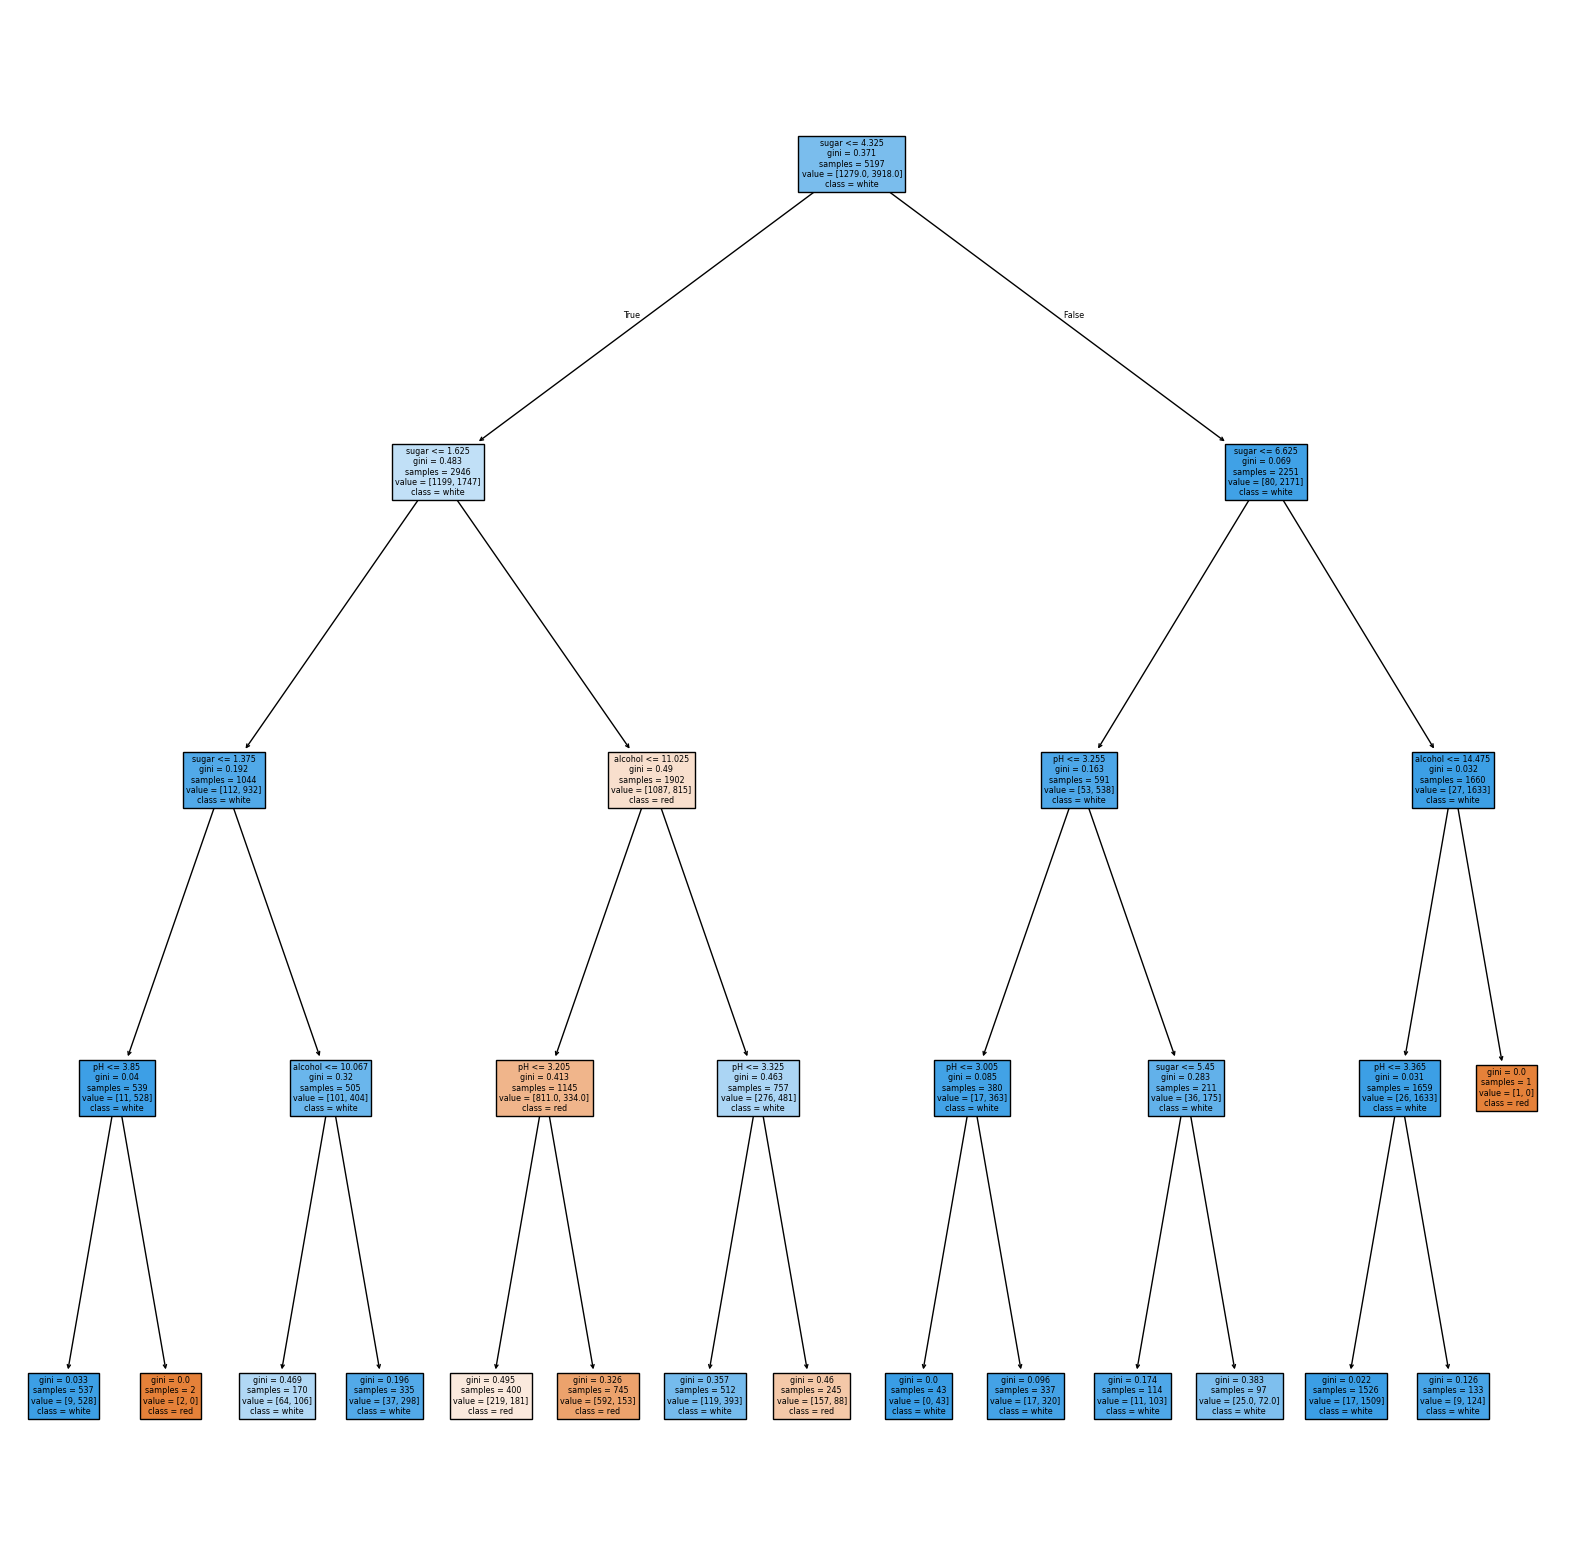

In [33]:
plt.figure(figsize=(20, 20))
plot_tree(tree_clf, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [35]:
print('훈련 셋 정확도:', tree_clf.score(X=x_train, y=y_train))
print('테스트 셋 정확도:', tree_clf.score(X=x_test, y=y_test))

훈련 셋 정확도: 0.8595343467385029
테스트 셋 정확도: 0.8523076923076923


max_depth의 값을 2 ~ 15까지 바꿔가면서 훈련 셋과 테스트 셋에서의 정확도를 계산하고, 시각화.

In [37]:
train_scores = []  # 훈련 셋 정확도를 저장할 리스트
test_scores = []  # 테스트 셋 정확도를 저장할 리스트
max_depths = np.arange(2, 16)  # max_depth 파라미터로 사용할 값들
for d in max_depths:
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42)  # 모델 생성
    tree_clf.fit(X=x_train, y=y_train)  # 모델 훈련
    tr_acc = tree_clf.score(X=x_train, y=y_train)  # 훈련 셋 정확도 계산
    train_scores.append(tr_acc)
    te_acc = tree_clf.score(X=x_test, y=y_test)  # 테스트 셋 정확도 계산
    test_scores.append(te_acc)

print(train_scores)
print(test_scores)

[0.8062343659803733, 0.8458726188185491, 0.8595343467385029, 0.8718491437367712, 0.8778141235328074, 0.8880123147969983, 0.9003271117952665, 0.9124494900904367, 0.9255339619010968, 0.941312295555128, 0.9538195112564941, 0.9680584952857417, 0.9757552434096595, 0.9834519915335771]
[0.8107692307692308, 0.8407692307692308, 0.8523076923076923, 0.8576923076923076, 0.8484615384615385, 0.8515384615384616, 0.8584615384615385, 0.8615384615384616, 0.8615384615384616, 0.8584615384615385, 0.8646153846153846, 0.8623076923076923, 0.8661538461538462, 0.8676923076923077]


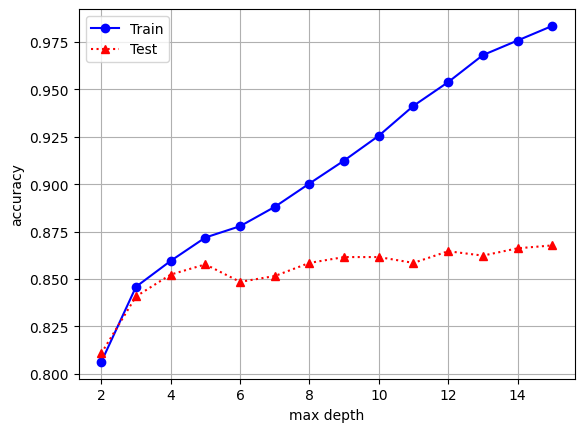

In [42]:
plt.plot(max_depths, train_scores, 'bo-', label='Train')
plt.plot(max_depths, test_scores, 'r^:', label='Test')

plt.legend()
plt.grid()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

**하이퍼 파라미터(hyper-parameter) 튜닝**

*   전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
*   하이퍼 파라미터를 변경하면서 훈련 셋으로 ML 모델을 훈련시킴.
*   하이퍼 파라미터 설정에 따른 성능 테스트는 검증 셋으로 수행.
    *   검증 셋에서 점수가 좋은(그리고 과대적합이 작은) 하이퍼 파라미터를 선택.
*   튜닝이 끝난 모델의 일반화 성능을 예측하기 위해서 테스트 셋을 마지막에 한 번 사용.


## Train/Validation/Test 나누고 하이퍼 파라미터 튜닝

In [45]:
# 전체 데이터 셋(x, y)을 훈련/테스트 셋으로 나눔.
x_tr_full, x_test, y_tr_full, y_test = train_test_split(x, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=y)

In [47]:
# 전체 훈련 셋(x_tr_full, y_tr_full)을 (작은) 훈련/검증 셋으로 나눔.
x_tr, x_val, y_tr, y_val = train_test_split(x_tr_full, y_tr_full,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_full)

In [51]:
x_tr.shape, x_val.shape, x_test.shape

((4157, 3), (1040, 3), (1300, 3))

훈련 셋과 검증 셋으로 max_depth를 튜닝

In [52]:
train_scores = []
validation_scores = []
max_depths = np.arange(2, 16)
for d in max_depths:
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree_clf.fit(X=x_tr, y=y_tr)
    tr_acc = tree_clf.score(X=x_tr, y=y_tr)
    train_scores.append(tr_acc)
    val_acc = tree_clf.score(X=x_val, y=y_val)
    validation_scores.append(val_acc)

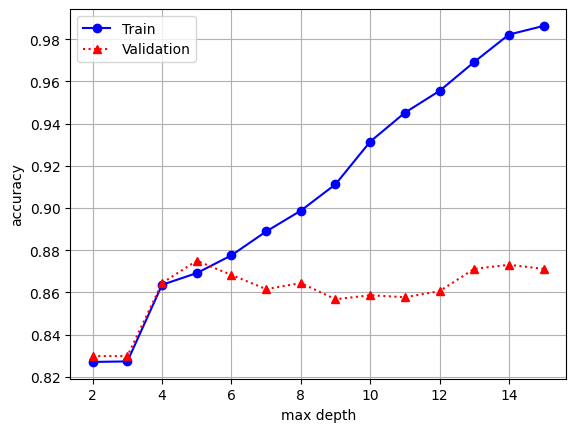

In [53]:
plt.plot(max_depths, train_scores, 'bo-', label='Train')
plt.plot(max_depths, validation_scores, 'r^:', label='Validation')
plt.legend()
plt.grid()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

## 훈련/검증 셋을 사용해서 `min_samples_split` 하이퍼 파라미터 튜닝

In [58]:
train_scores = []
validation_scores = []
min_samples_split = np.arange(0.005, 0.125, 0.005)
for s in min_samples_split:
    tree_clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    tree_clf.fit(X=x_tr, y=y_tr)
    tr_acc = tree_clf.score(X=x_tr, y=y_tr)
    val_acc = tree_clf.score(X=x_val, y=y_val)
    train_scores.append(tr_acc)
    validation_scores.append(val_acc)

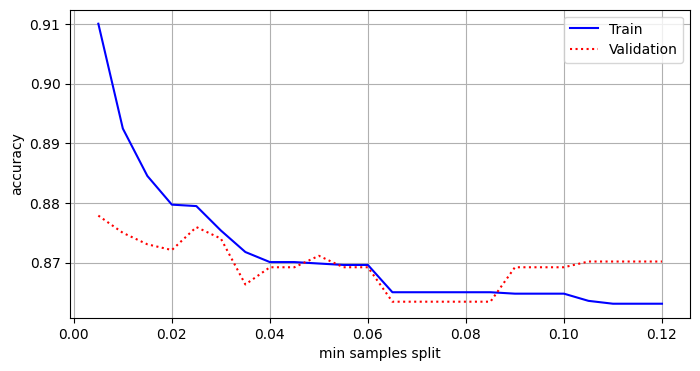

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(min_samples_split, train_scores, 'b-', label='Train')
plt.plot(min_samples_split, validation_scores, 'r:', label='Validation')
plt.legend()
plt.grid()
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.show()

# 교차 검증(Cross Validation)

**n-fold 교차검증(CV)**

*   전체 훈련 셋을 n개의 파티션으로 나눠서 (n-1)개는 훈련할 때 사용하고, 1개는 검증용으로 사용.
*   검증용 세트를 바꿔가면서 n번 훈련/검증을 반복.
*   n개의 훈련 셋 점수를 평균, n개의 검증 셋 점수를 평균.


In [62]:
# 교차 검증에서 사용할 ML 모델 생성(Decision Tree, max_depth=5)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# 5-fold CV: 전체 훈련 셋을 5개로 나누고 그 중 한 개를 검증 셋으로 사용.
# estimator 파라미터: 예측기. ML 모델 객체.
# X, y: 훈련 셋, 훈련 레이블.
# cv: n-fold cv에서 n값.
# n_jobs: 동시에(병렬로) 수행할 작업 개수. 기본값은 1. -1인 경우에는 CPU의 모든 코어를 사용.
# return_train_score: 훈련 점수를 리턴할 지 여부.
cv = cross_validate(estimator=clf, X=x_tr_full, y=y_tr_full, cv=5,
                    n_jobs=-1, return_train_score=True)

In [63]:
cv  #> dict(key-value)

{'fit_time': array([0.00798702, 0.01055026, 0.00831294, 0.00703526, 0.00974655]),
 'score_time': array([0.00401759, 0.00408983, 0.00151706, 0.00138783, 0.00147772]),
 'test_score': array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549]),
 'train_score': array([0.86817416, 0.8708203 , 0.87662338, 0.87638288, 0.87469937])}

In [65]:
# 각각의 교차검증에서 검증 셋의 정확도 평균
np.mean(cv['test_score'])

np.float64(0.8631863108018065)

In [66]:
# 각각의 교차검증에서 훈련 셋의 정확도 평균
np.mean(cv['train_score'])
#> 교차검증에서 훈련 셋 정확도 평균은 교차검증을 하지 않은 경우와 비슷하거나 약간 좋음.

np.float64(0.8733400189738896)

In [67]:
# n-fold CV에서 각각의 검증 셋에서의 점수(정확도)들의 배열
cross_val_score(estimator=clf, X=x_tr_full, y=y_tr_full, cv=5, n_jobs=-1)

array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549])

## 교차 검증을 사용한 max_depth 하이퍼 파라미터 튜닝

In [68]:
train_scores = []
validation_scores = []
max_depths = np.arange(2, 16)
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv = cross_validate(estimator=clf, X=x_tr_full, y=y_tr_full, cv=5,
                        n_jobs=-1, return_train_score=True)
    tr_acc = np.mean(cv['train_score'])  # 5-fold cv에서 5개 훈련 점수들의 평균
    val_acc = np.mean(cv['test_score'])  # 5-fold cv에서 5개 검증(테스트) 점수들의 평균
    train_scores.append(tr_acc)
    validation_scores.append(val_acc)

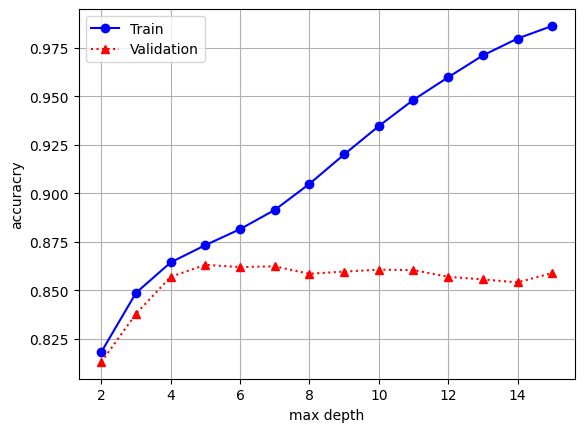

In [69]:
plt.plot(max_depths, train_scores, 'bo-', label='Train')
plt.plot(max_depths, validation_scores, 'r^:', label='Validation')
plt.legend()
plt.grid()
plt.xlabel('max depth')
plt.ylabel('accuracry')
plt.show()

교차 검증(CV)에서 가장 좋은 검증(테스트) 점수와 그때의 하이퍼 파라미터 찾기

In [71]:
np.max(validation_scores)  #> 배열(리스트)의 최댓값

np.float64(0.8631863108018065)

In [73]:
idx = np.argmax(validation_scores)  #> 배열(리스트)의 최댓값의 인덱스
idx

np.int64(3)

In [74]:
max_depths[idx]  #> 검증 셋 점수가 최대가 되는 max_depth 값.

np.int64(5)

# Grid Search CV

여러 개의 하이퍼 파라미터들의 조합에서 최적의 파라미터 조합을 찾는 과정.

In [76]:
# 하이퍼 파라미터 튜닝에 사용할 ML 모델(예측기, estimator) 생성
clf = DecisionTreeClassifier(random_state=42)

In [77]:
# 튜닝할 파라미터들의 조합(grid)을 dict로 만듦. 키는 ML 클래스의 파라미터 이름을 사용.
params = {
    'max_depth': np.arange(2, 21),
    'min_samples_split': np.arange(2, 101, 2)
}

In [78]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=clf, param_grid=params, n_jobs=-1)

In [79]:
# GridSearchCV 실행(훈련)
grid_cv.fit(X=x_tr_full, y=y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_samples_split': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])})

In [80]:
grid_cv.best_score_  # 교차 검증에서 'test_score'(검증 점수)의 최댓값

np.float64(0.867805767379877)

In [81]:
grid_cv.best_params_  # 교차 검증에서 'test_score'를 최대로 만들어 주는 파라미터 조합

{'max_depth': np.int64(7), 'min_samples_split': np.int64(84)}

In [82]:
grid_cv.best_estimator_  # 교차 검증에서 'test_score'가 최대인 최적인 ML 모델

DecisionTreeClassifier(max_depth=np.int64(7), min_samples_split=np.int64(84),
                       random_state=42)